<a href="https://colab.research.google.com/github/marcellarseixas/marcellarseixas/blob/main/Projeto_botic%C3%A1rio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# **Case 4**

Hoje, para a produção de alguns perfumes, o grupo boticário necessita importar alguns óleos
essenciais/extratos de fora do país. Para fazer uma boa importação, é muito importante
acompanhar o preço por KG desse produto nos últimos meses para ajudar na negociação de
preço para as próximas importações. Estamos querendo começar a importar da França
(COD_PAIS = 275) através de navios (COD_VIA = 1).

Tendo isso em vista, desenvolva um script em python, 100% automatizado, para acompanhar o
preço/kg desse tipo de produto (NCM = 33030010) no estado de SP durante os meses de 2023
e 2024. É super importante ser totalmente automatizado, pois precisaremos atualizar esse
estudo todos os meses.

Dados:
https://www.gov.br/produtividade-e-comercio-exterior/pt-br/assuntos/comercio-exterior/estatisticas/base-de-dados-bruta```



In [44]:
#Importando as bibliotecas necessárias

import pandas as pd
import requests
import json
#import datetime  # This import is already covered by the line below.
import matplotlib.pyplot as plt
import seaborn as sns
from google.cloud import bigquery
from datetime import datetime  # This imports the datetime class directly
import pandas_gbq
from google.oauth2 import service_account
import google.api_core.exceptions


In [45]:
#Mês e ano mais recente

current_year = datetime.now().year
current_month = datetime.now().month


# Formatar a data de acordo com o formato da API
mes_atual = "{}-{:02d}".format(current_year, current_month)

print(mes_atual )

2024-10


In [46]:
# Definir a URL da API do ComexStat

url = "https://api-comexstat.mdic.gov.br/general"


# Definir os headers da requisição, informando que queremos os dados no formato JSON

headers = {
    "Accept": "application/json",
    "Content-Type": "application/json"
}

# Definir os dados para o POST request, com os parâmetros de filtro para a API

data = {
    "flow": "import",
    "monthDetail": True,
    "period": {
        "from": "2023-01",
        "to": mes_atual
    },
    "filters": [
        {
            "filter": "country",
            "values": [275]
        }
        ,
         {
             "filter": "ncm",
             "values": [33030010]
         } ,
         {
             "filter": "state",
             "values": [41]
         } ,
         {
             "filter": "via",
             "values": ["01"]
         } ,
    ],
    "details": ["country", "state", "ncm"],
    "metrics": [
        "metricFOB",
        "metricKG"
    ]
}

# Fazer a requisição POST para a API

response = requests.post(url, headers=headers, data=json.dumps(data), verify=False)

# Verificar se a requisição foi bem-sucedida

if response.status_code == 200:
    print("Success!")
    # print(response.json())

else:
    print(f"Error: {response.status_code}")


/usr/local/lib/python3.10/dist-packages/urllib3/connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'api-comexstat.mdic.gov.br'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


Success!


In [47]:
# Extrair os dados JSON da resposta

list_json = response.json()

chaves = list_json.keys()
chaves

dict_keys(['data', 'success', 'message', 'processo_info', 'language'])

In [48]:
# Convertendo os dados para um DataFrame do pandas

json_to_df = list_json['data']['list']

In [49]:
# Convertendo os dados para um DataFrame do pandas

df = pd.DataFrame(json_to_df)
df

,coNcm,year,monthNumber,country,state,ncm,metricFOB,metricKG
0,33030010,2024,08,França,São Paulo,Perfumes (extratos),41757,938
1,33030010,2024,05,França,São Paulo,Perfumes (extratos),33592,1014
2,33030010,2024,07,França,São Paulo,Perfumes (extratos),24415,1076
3,33030010,2024,09,França,São Paulo,Perfumes (extratos),23141,1108
4,33030010,2024,01,França,São Paulo,Perfumes (extratos),6311,282
5,33030010,2024,02,França,São Paulo,Perfumes (extratos),5076,155
6,33030010,2024,06,França,São Paulo,Perfumes (extratos),4542,126
7,33030010,2024,03,França,São Paulo,Perfumes (extratos),2494,58
8,33030010,2024,04,França,São Paulo,Perfumes (extratos),225,23
9,33030010,2023,07,França,São Paulo,Perfumes (extratos),29725,626


from matplotlib import pyplot as plt
df['preco_por_kg'].plot(kind='hist', bins=20, title='preco_por_kg')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('year').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['preco_por_kg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('year')):
  _plot_series(series, series_name, i)
  fig.legend(title='year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('preco_por_kg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('date', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('year')):
  _plot_series(series, series_name, i)
  fig.legend(title='year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['year']
  ys = series['preco_por_kg']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('year')):
  _plot_series(series, series_name, i)
  fig.legend(title='year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('preco_por_kg')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['year']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'year'}, axis=1)
              .sort_values('year', ascending=True))
  xs = counted['year']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = df.sort_values('year', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('year')):
  _plot_series(series, series_name, i)
  fig.legend(title='year', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('year')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
df['preco_por_kg'].plot(kind='line', figsize=(8, 4), title='preco_por_kg')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(df['year'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(df, x='preco_por_kg', y='year', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [50]:
#Criação da coluna preço/kg

df['preco_por_kg'] = df['metricFOB'].astype(float) / df['metricKG'].astype(float)

In [51]:
df.head()

,coNcm,year,monthNumber,country,state,ncm,metricFOB,metricKG,preco_por_kg
0,33030010,2024,08,França,São Paulo,Perfumes (extratos),41757,938,44.517058
1,33030010,2024,05,França,São Paulo,Perfumes (extratos),33592,1014,33.128205
2,33030010,2024,07,França,São Paulo,Perfumes (extratos),24415,1076,22.690520
3,33030010,2024,09,França,São Paulo,Perfumes (extratos),23141,1108,20.885379
4,33030010,2024,01,França,São Paulo,Perfumes (extratos),6311,282,22.379433


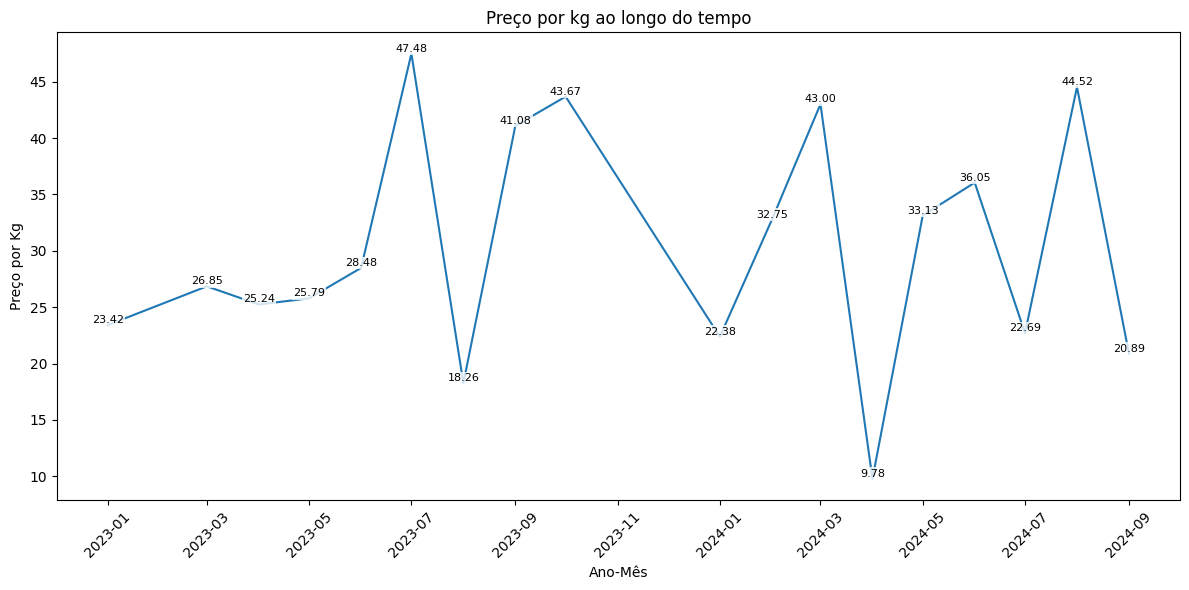

In [52]:
# Criação de uma nova coluna 'date' combinando ano e mês, para facilitar a visualização de dados

df['date'] = pd.to_datetime(df['year'].astype(str) + '-' + df['monthNumber'].astype(str), format='%Y-%m')

# Plotar os dados de preço por kg ao longo do tempo

plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='preco_por_kg', data=df)


# Personalizando o gráfico

plt.title('Preço por kg ao longo do tempo')
plt.xlabel('Ano-Mês')
plt.ylabel('Preço por Kg')
plt.xticks(rotation=45)

# Adicionar rótulo de dados

ax = plt.gca()

for index, row in df.iterrows():
    ax.text(row['date'], row['preco_por_kg'], f"{row['preco_por_kg']:.2f}",
            ha='center', va='bottom', fontsize=8,
            transform=ax.transData,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='none', pad=1))

plt.tight_layout() # Ajustar o layout do gráfico
plt.show() # Exibir o gráfico

In [53]:
 # Exportar o DataFrame para CSV

csv_file = f"Importacao_COMEX_{datetime.now().strftime('%Y-%m-%d')}.csv"
df.to_csv(csv_file, index=False)  # Exporta o DataFrame para um arquivo CSV
print(f"Dados exportados para {csv_file} com sucesso!")

Dados exportados para Importacao_COMEX_2024-10-15.csv com sucesso!


In [54]:
importacao_comex = df

In [55]:
importacao_comex

,coNcm,year,monthNumber,country,state,ncm,metricFOB,metricKG,preco_por_kg,date
0,33030010,2024,08,França,São Paulo,Perfumes (extratos),41757,938,44.517058,2024-08-01
1,33030010,2024,05,França,São Paulo,Perfumes (extratos),33592,1014,33.128205,2024-05-01
2,33030010,2024,07,França,São Paulo,Perfumes (extratos),24415,1076,22.690520,2024-07-01
3,33030010,2024,09,França,São Paulo,Perfumes (extratos),23141,1108,20.885379,2024-09-01
4,33030010,2024,01,França,São Paulo,Perfumes (extratos),6311,282,22.379433,2024-01-01
5,33030010,2024,02,França,São Paulo,Perfumes (extratos),5076,155,32.748387,2024-02-01
6,33030010,2024,06,França,São Paulo,Perfumes (extratos),4542,126,36.047619,2024-06-01
7,33030010,2024,03,França,São Paulo,Perfumes (extratos),2494,58,43.000000,2024-03-01
8,33030010,2024,04,França,São Paulo,Perfumes (extratos),225,23,9.782609,2024-04-01
9,33030010,2023,07,França,São Paulo,Perfumes (extratos),29725,626,47.484026,2023-07-01


In [56]:
#Enviando as informações/atualizando a tabela no o google bigquery
key_path = "GBQ.json"
credentials = service_account.Credentials.from_service_account_file(key_path, scopes=["https://www.googleapis.com/auth/cloud-platform"])

client = bigquery.Client(credentials=credentials, project="phrasal-agility-438319-r9")

# Verificar se o dataset ja existe, se não existir, criar
dataset_id = "Dados"
dataset_ref = client.dataset(dataset_id)

try:
    client.get_dataset(dataset_ref)
    print(f"Dataset '{dataset_id}' exists.")
except google.cloud.exceptions.NotFound:
    print(f"Dataset '{dataset_id}' does not exist. Creating it...")
    dataset = bigquery.Dataset(dataset_ref)
    dataset = client.create_dataset(dataset)
    print(f"Dataset '{dataset_id}' created.")

df.to_gbq(
    destination_table="Dados.importacao_comex",
    project_id="phrasal-agility-438319-r9",
    if_exists="replace",
    credentials=credentials,
)

Dataset 'Dados' exists.


<ipython-input-56-a605fe025136>:21: FutureWarning: to_gbq is deprecated and will be removed in a future version. Please use pandas_gbq.to_gbq instead: https://pandas-gbq.readthedocs.io/en/latest/api.html#pandas_gbq.to_gbq
  df.to_gbq(
100%|██████████| 1/1 [00:00<00:00, 7332.70it/s]
